## Chapter 4 - Clustering

#### Iris datasets

In [1]:
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

X = data.data
y = data.target
#data.DESCR
#data.data
#data.target_names
#data.target

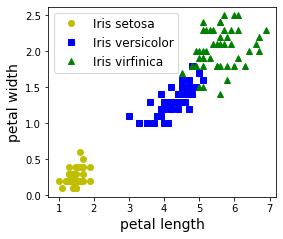

In [3]:
#visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(9,3.5))

plt.subplot(121)
plt.plot(X[y==0,2],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1,2],X[y==1,3],"bs",label="Iris versicolor")
plt.plot(X[y==2,2],X[y==2,3],"g^",label="Iris virfinica")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(fontsize=12)
plt.show()

## Gaussian

In [4]:
from sklearn.mixture import GaussianMixture

In [5]:
y_pred = GaussianMixture(n_components=3,random_state=42).fit(X).predict(X)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
from scipy import stats
import numpy as np

mapping = {}
for class_id in np.unique(y):
    mode,_ = stats.mode(y_pred[y==class_id])
    mapping[mode[0]] = class_id 
mapping

{1: 0, 2: 1, 0: 2}

In [7]:
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

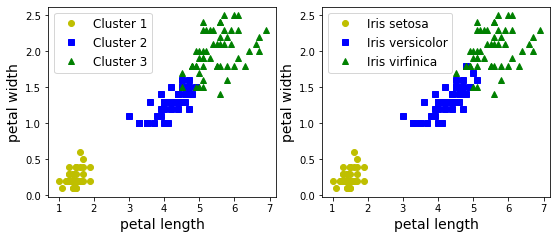

In [8]:
plt.figure(figsize=(9,3.5))
plt.subplot(121)
plt.plot(X[y_pred==0,2],X[y_pred==0,3],"yo",label="Cluster 1")
plt.plot(X[y_pred==1,2],X[y_pred==1,3],"bs",label="Cluster 2")
plt.plot(X[y_pred==2,2],X[y_pred==2,3],"g^",label="Cluster 3")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.plot(X[y==0,2],X[y==0,3],"yo",label="Iris setosa")
plt.plot(X[y==1,2],X[y==1,3],"bs",label="Iris versicolor")
plt.plot(X[y==2,2],X[y==2,3],"g^",label="Iris virfinica")
plt.xlabel("petal length",fontsize=14)
plt.ylabel("petal width",fontsize=14)
plt.legend(fontsize=12)
plt.show()

In [9]:
#accuuracy
np.sum(y_pred == y)
np.sum(y_pred==y)/len(y_pred)

0.9666666666666667

## K-Means

In [10]:
#create dataset
from sklearn.datasets import make_blobs

In [11]:
blob_centers = np.array(
    [[0.2,2.3],
    [-1.5,2.3],
    [-2.8,1.8],
    [-2.8,2.8],
    [-2.8,1.3]]
)
blob_std = np.array([0.4,0.3,0.1,0.1,0.1])

In [12]:
X,y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,random_state=7)
print(X)
print(y)

[[-2.69823941  1.3454702 ]
 [-2.87459835  1.8097575 ]
 [ 0.96077126  1.17046777]
 ...
 [-2.80303543  2.72948115]
 [ 0.24057359  2.40103109]
 [-2.63807768  1.95621065]]
[4 2 0 ... 3 0 2]


In [13]:
def plot_cluster(X,y=None):
    plt.scatter(X[:,0],X[:,1],c=y,s=1)
    plt.xlabel("X_1",fontsize=14)
    plt.ylabel("X_2",fontsize=14)
    plt.figure(figsize=(8,4))
    plt.show()


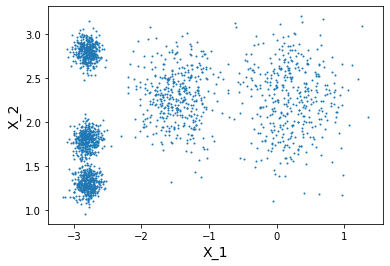

<Figure size 576x288 with 0 Axes>

In [14]:
plot_cluster(X)

In [15]:
from sklearn.cluster import KMeans

In [16]:
k = 5 
kmeans = KMeans(n_clusters=k,random_state=42)
y_pred = kmeans.fit_predict(X)
y_pred

array([4, 0, 1, ..., 2, 1, 0])

In [17]:
kmeans.cluster_centers_
'''
#blob_centers = np.array(
    [[0.2,2.3],
    [-1.5,2.3],
    [-2.8,1.8],
    [-2.8,2.8],
    [-2.8,1.3]]
)
'''

'\n#blob_centers = np.array(\n    [[0.2,2.3],\n    [-1.5,2.3],\n    [-2.8,1.8],\n    [-2.8,2.8],\n    [-2.8,1.3]]\n)\n'

In [18]:
#predict
X_new = np.array([[0,2],[3,2],[-3,3],[-3,2.5]])
kmeans.predict(X_new)

array([1, 1, 2, 2])

In [19]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

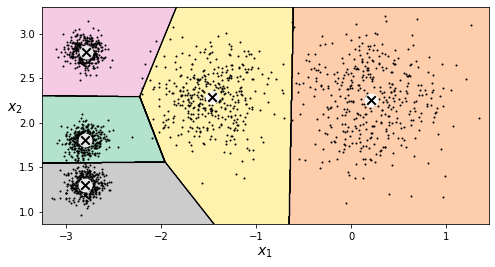

In [20]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

## The K-means Algorithm

In [21]:
kmeans_iter1 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=1,random_state=0)
kmeans_iter2 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=2,random_state=0)
kmeans_iter3 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",max_iter=3,random_state=0)

kmeans_iter1.fit(X)
kmeans_iter2.fit(X)
kmeans_iter3.fit(X)

KMeans(algorithm='full', init='random', max_iter=3, n_clusters=5, n_init=1,
       random_state=0)

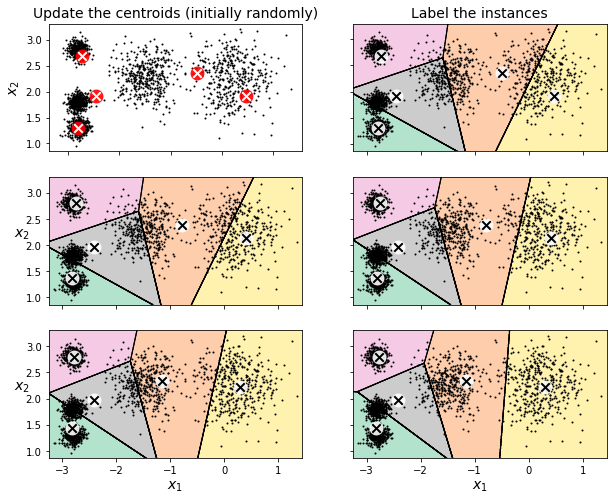

In [22]:
plt.figure(figsize=(10, 8))

plt.subplot(321)
plot_data(X)
plot_centroids(kmeans_iter1.cluster_centers_, circle_color='r', cross_color='w')
plt.ylabel("$x_2$", fontsize=14)
plt.tick_params(labelbottom=False)
plt.title("Update the centroids (initially randomly)", fontsize=14)

plt.subplot(322)
plot_decision_boundaries(kmeans_iter1, X, show_xlabels=False, show_ylabels=False)
plt.title("Label the instances", fontsize=14)

plt.subplot(323)
plot_decision_boundaries(kmeans_iter1, X, show_centroids=False, show_xlabels=False)
plot_centroids(kmeans_iter2.cluster_centers_)

plt.subplot(324)
plot_decision_boundaries(kmeans_iter2, X, show_xlabels=False, show_ylabels=False)

plt.subplot(325)
plot_decision_boundaries(kmeans_iter2, X, show_centroids=False)
plot_centroids(kmeans_iter3.cluster_centers_)

plt.subplot(326)
plot_decision_boundaries(kmeans_iter3, X, show_ylabels=False)

## Inertia

In [23]:
kmeans.inertia_

211.5985372581684

In [24]:
kmean_rnd_init1 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",random_state=2)
kmean_rnd_init2 = KMeans(n_clusters=5,init="random",n_init=1,algorithm="full",random_state=5)

kmean_rnd_init1.fit(X)
kmean_rnd_init2.fit(X)

KMeans(algorithm='full', init='random', n_clusters=5, n_init=1, random_state=5)

In [25]:
kmean_rnd_init1.inertia_

219.435394427714

In [26]:
kmean_rnd_init2.inertia_

211.5985372581684

## Finding the optimal number of clusters

In [27]:
kmeans_per_k = [KMeans(n_clusters=k,random_state=42).fit(X) for k in range(1,10)]

inertias = [model.inertia_ for model in kmeans_per_k]

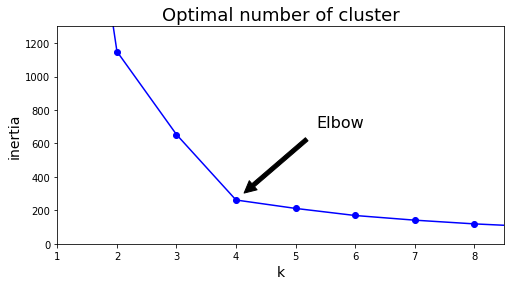

In [28]:
plt.figure(figsize=(8,4))
plt.plot(range(1,10),inertias,"bo-")
plt.xlabel("k",fontsize=14)
plt.ylabel("inertia",fontsize=14)
plt.title("Optimal number of cluster",fontsize=18)
plt.axis([1,8.5,0,1300])
plt.annotate("Elbow",
             xy=(4,inertias[3]),
             xytext=(0.55,0.55),
             fontsize=16,
             arrowprops=dict(facecolor="black",shrink=0.1),
             textcoords="figure fraction"
            )
plt.show()

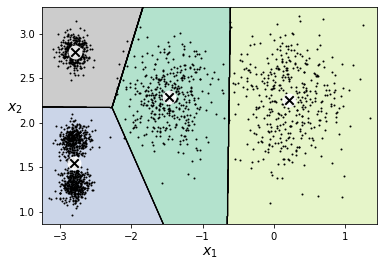

261.796777856947

In [29]:
plot_decision_boundaries(kmeans_per_k[4-1],X) #k(4) = 4-1 
plt.show()
kmeans_per_k[4-1].inertia_

## Silhouette score

In [30]:
from sklearn.metrics import silhouette_score

In [31]:
kmeans.labels_ # like a predict values

silhouette_score(X,kmeans.labels_)

0.655517642572828

In [32]:
silhouette_scores = [silhouette_score(X,model.labels_) for model in kmeans_per_k[1:]]

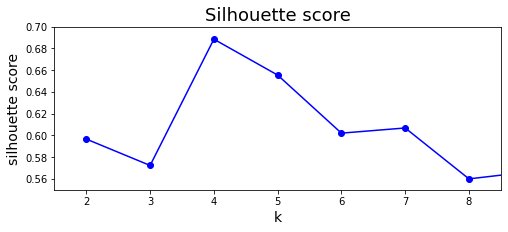

In [42]:
plt.figure(figsize=(8,3))
plt.plot(range(2,10),silhouette_scores,"bo-")
plt.xlabel("k",fontsize= 14)
plt.ylabel("silhouette score",fontsize=14)
plt.axis([1.5,8.5,0.55,0.7])
plt.title("Silhouette score",fontsize=18)
plt.show()


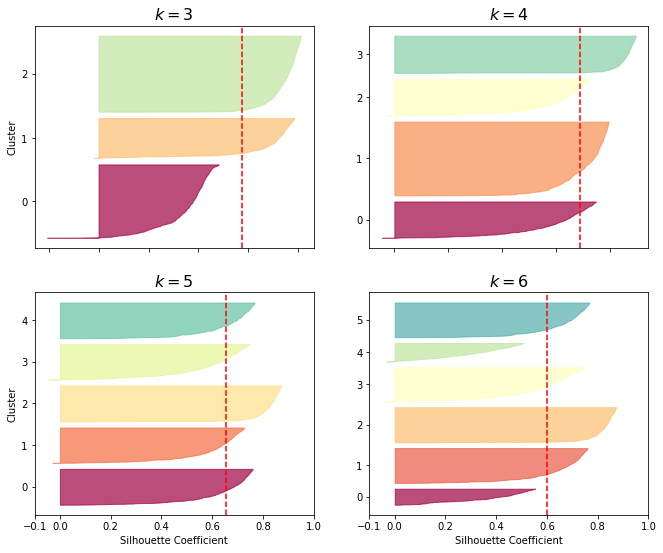

In [44]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl
plt.figure(figsize=(11, 9))

for k in (3, 4, 5, 6):
    plt.subplot(2, 2, k - 2)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()